# 11. Kernel Ridge Regression

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rhennig/EMA6938/blob/main/Notebooks/11.KernelRidgeRegression.ipynb)

(Source: https://github.com/marcosdelcueto/Tutorial_KRR)

The previous notebooks on Gaussian Kernel Regression applied the kernel trick for regression together with a radial basis function (RBF) kernel. The kernel trick enable kernel regression to learn a linear function in the space corresponding to the kernel. For non-linear kernels, this corresponds to a non-linear function in the original space of the data.

In this notebook, we explore **Kernel Ridge Regression (KRR)**, which adds $L_2$ regularization to kernel regression.

KRR is a powerful machine learning technique because it results in a convex optimization problem that is straightforward to train and only requires few hyperparameters.

In this tutorial, we will use Python’s scikit-learn library, which provides easy access to kernel ridge regression. We will cover:

- Linear regression
- When linear regression fails
- Kernel Ridge Regression to the rescue
- Regularization parameter
- Optimized KRR

## Linear Regression

A large number of processes in nature follow linear relationships, and it is a good place to start when trying to fit data to a function. If we have a target property $y$ (dependent variable) that depends on the values of a feature $x$ (independent variable). They follow a linear relationship if $y$ can be approximated as
$$
y = a + b x,
$$
where $a$ represents the $y$-intercept and $b$ is the slope of the line. Note that $x$ and $y$ can be vectors of any dimensionality. For simplicity, we will consider here that both $x$ and $y$ are one-dimensional. This means that we have a single target property that depends on the value of just one feature.

In [26]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

In [27]:
# Initialize random seed
np.random.seed(19)

# Create dataset with 11 points following quasi-lienar relation in interval [-5,5]
x = np.linspace(-5, 5, 11, endpoint=True)
y = x + (np.random.rand(11)-0.5)*4
for i in range(len(x)):
    print(x[i], '\t ', y[i])

# Create list with 1010 points in interval x:[-5,5]
x_pred = np.linspace(-5, 5, 101, endpoint=True)

-5.0 	  -6.609865593002194
-4.0 	  -2.955001133300575
-3.0 	  -4.012248107334692
-2.0 	  -3.447473250094722
-1.0 	  -1.6742137469162741
0.0 	  -1.6680017399724285
1.0 	  1.6879083251218665
2.0 	  3.22637519264663
3.0 	  4.930967658176856
4.0 	  4.54264293918741
5.0 	  3.8636930241887213


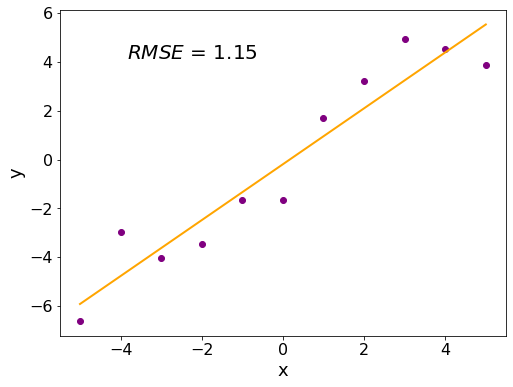

In [28]:
# Transform lists to np arrays
x = np.array(x).reshape(-1, 1)
x_pred = np.array(x_pred).reshape(-1, 1)

# Do linear regression using database with 11 points
regr = linear_model.LinearRegression()
regr.fit(x, y)

# Calculate value of linear regressor at 101 points in interval x:[-5,5]
y_pred = regr.predict(x_pred)

# Calculate value of linear regressor at 11 points in interval x:[-5,5]
new_y = regr.predict(x)

# Calculate rmse value
rmse = np.sqrt(mean_squared_error(new_y, y))

# Set axes and labels
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot()
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.annotate(u'$RMSE$ = %.2f' % rmse, xy=(0.15,0.85), xycoords='axes fraction', fontsize=20)
plt.plot(x_pred, y_pred, color='orange', linestyle='solid', linewidth=2)
plt.scatter(x, y, color='purple')
plt.show()

## When Linear Regression Fails

Linear regression is ubiquitous and it should be a first go-to when trying to fit data. For the next example, we have generated a larger database, with 21 points, in which $y$ is calculated by a 4th order poolynomial plus a random variation in the interval [-1,1]:
$$
y=(x+4)⋅(x+1)⋅(x−1)⋅(x−3)+\mathrm{rnd}(−1,1).
$$

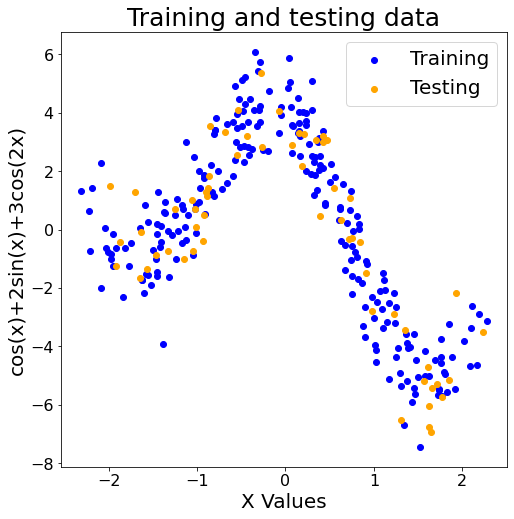

In [29]:
# Import libraries
from sklearn.model_selection import train_test_split

# Initialize random seed
np.random.seed(2020)

# Generate a data set for machine learning
np.random.seed(seed=5)
x = np.linspace(-2, 2, 300)
x = x + np.random.normal(0, .3, x.shape)
y = np.cos(x) - 2*np.sin(x) + 3*np.cos(x*2) + np.random.normal(0, 1, x.shape)

# Create list with 1001 points in interval of x data
x_pred = np.linspace(np.amin(x), np.amax(x), 1001, endpoint=True)
x_pred = np.array(x_pred).reshape(-1, 1)

# Split the dataset into 80% for training and 20% for testing
x = x.reshape((x.size,1))
x_train,x_test,y_train,y_test = train_test_split(x, y, train_size=0.8, shuffle=True)

# Plot the training and testing dataset
fig,ax=plt.subplots(figsize=(8,8))
ax.scatter(x_train, y_train, color='blue', label='Training')
ax.scatter(x_test, y_test, color='orange', label='Testing')
ax.set_xlabel('X Values',fontsize=20)
ax.set_ylabel('cos(x)+2sin(x)+3cos(2x)',fontsize=20)
ax.set_title('Training and testing data',fontsize=25)
plt.legend(fontsize=20)
plt.show()

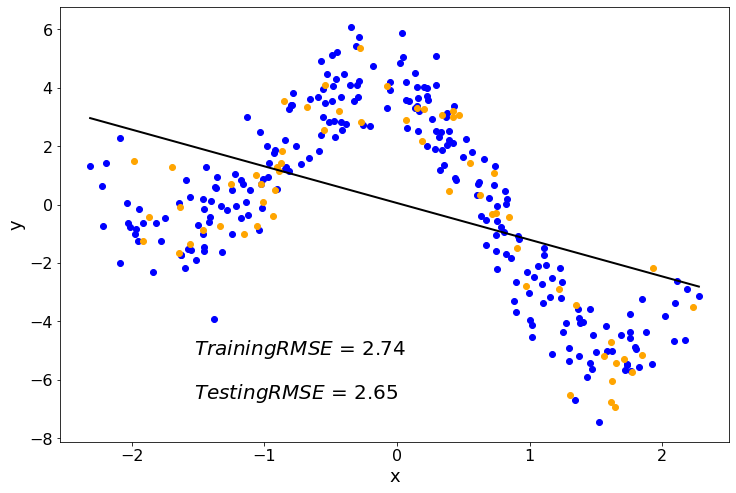

In [30]:
# Do linear regression using database with 21 points
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Calculate value of linear regressor at 1060 points in interval x:[-5,5]
y_pred = regr.predict(x_pred)

# Calculate training and testing errors
training_predictions = regr.predict(x_train)
training_rmse = np.sqrt(mean_squared_error(y_train, training_predictions))

testing_predictions = regr.predict(x_test)
testing_rmse = np.sqrt(mean_squared_error(y_test, testing_predictions))

# Set axes and labels
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot()
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)
ax.annotate(u'$Training RMSE$ = %.2f' % training_rmse, xy=(0.2,0.2), xycoords='axes fraction', fontsize=20)
ax.annotate(u'$Testing RMSE$ = %.2f' % testing_rmse, xy=(0.2,0.1), xycoords='axes fraction', fontsize=20)

plt.plot(x_pred, y_pred, color='black', linestyle='solid', linewidth=2)
plt.scatter(x_train, y_train, color='blue', label='Training')
plt.scatter(x_test, y_test, color='orange', label='Testing')
plt.show()

We clearly observes that the linear regression in orange fails to describe the trend followed by the violet points. This also results into a much larger RMSE.

## Kernel Ridge Regression to the rescue

Linear regression is often insufficient to model complex data, When linear regression fails, we should use non-linear regression methods that allow greater flexibility.

KRR uses the kernel trick to transform our dataset to the kernel space and then performs a linear regression in kernel-space. Therefore, one should always **choose the appropriate kernel for a problem**.

In this case, we will be using using a polynomial kernel. The polynomial kernel for two vectors (two points in our one-dimensional example) ${\bf x}_1$ and ${\bf x}_2$ is:
$$
K({\bf x}_1, {\bf x}_2) = \left ( \gamma ({\bf x}_1^\mathrm{T} {\bf x}_2) + c \right )^d,
$$
where $\gamma$ is the kernel coefficient, $c$ is the independent term and $d$ is the degree of the polynomial. In this case, $\gamma$ and $c$ play a minor role, and their default value of 1.0 is adequate, so we will only focus on optimizing the polynomial degree $d$.

Next, we perform KRR regression using polynomial kernels of different degrees.

In [31]:
# Import libraries
from sklearn.kernel_ridge import KernelRidge

1


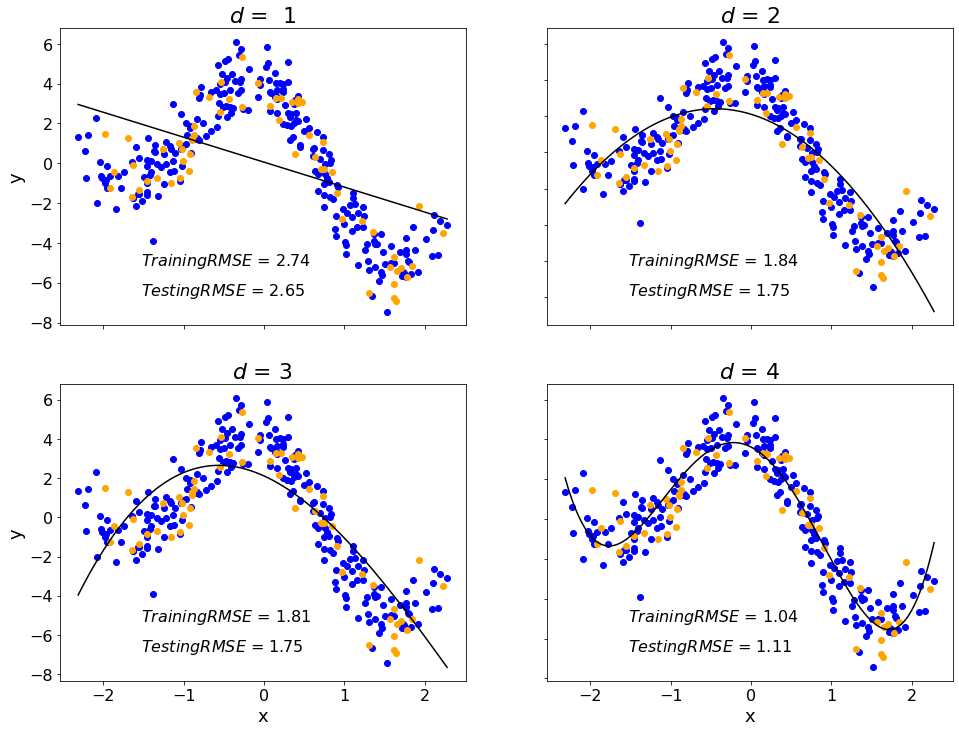

In [32]:
# Create lists to store results
y_pred = []
training_predictions = []
training_rmse = []
testing_predictions = []
testing_rmse = []

# For each of the tested polynomial degree values
degrees = [1, 2, 3, 4]
print(degrees[0])
for degree_value in degrees:
    krr = KernelRidge(alpha=1.0,kernel='polynomial',degree=degree_value)
    krr.fit(x_train, y_train)
    y_pred.append(krr.predict(x_pred))
    pred_y_train = krr.predict(x_train)
    pred_y_test  = krr.predict(x_test)
    
    # Calculate training and testing errors
    training_predictions.append(pred_y_train)
    training_rmse.append(np.sqrt(mean_squared_error(y_train, pred_y_train)))

    testing_predictions.append(pred_y_test)
    testing_rmse.append(np.sqrt(mean_squared_error(y_test, pred_y_test)))

# Set axes and labels
fig, axs = plt.subplots(2, 2, figsize = (16,12))
for ax in axs.flat:
    ax.set_xlabel('x', fontsize = 18)
    ax.set_ylabel('y', fontsize = 18)
    ax.scatter(x_train, y_train, color='blue', label='Training')
    ax.scatter(x_test, y_test, color='orange', label='Testing')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# Subplot top-left
axs[0, 0].plot(x_pred, y_pred[0],color='black')
axs[0, 0].set_title(r'$d$ = %2d' % degrees[0], fontsize = 22)
axs[0, 0].annotate(u'$Training RMSE$ = %.2f' % training_rmse[0], xy=(0.2,0.2), xycoords='axes fraction', fontsize=16)
axs[0, 0].annotate(u'$Testing RMSE$ = %.2f' % testing_rmse[0], xy=(0.2,0.1), xycoords='axes fraction', fontsize=16)
# Subplot top-right
axs[0, 1].plot(x_pred, y_pred[1], color='black')
axs[0, 1].set_title(r'$d$ = %d' % degrees[1], fontsize = 22)
axs[0, 1].annotate(u'$Training RMSE$ = %.2f' % training_rmse[1], xy=(0.2,0.2), xycoords='axes fraction', fontsize=16)
axs[0, 1].annotate(u'$Testing RMSE$ = %.2f' % testing_rmse[1], xy=(0.2,0.1), xycoords='axes fraction', fontsize=16)
# Subplot bottom-left
axs[1, 0].plot(x_pred, y_pred[2], color='black')
axs[1, 0].set_title(r'$d$ = %d' % degrees[2], fontsize = 22)
axs[1, 0].annotate(u'$Training RMSE$ = %.2f' % training_rmse[2], xy=(0.2,0.2), xycoords='axes fraction', fontsize=16)
axs[1, 0].annotate(u'$Testing RMSE$ = %.2f' % testing_rmse[2], xy=(0.2,0.1), xycoords='axes fraction', fontsize=16)
# Subplot bottom-right
axs[1, 1].plot(x_pred, y_pred[3], color='black')
axs[1, 1].set_title(r'$d$ = %d' % degrees[3], fontsize = 22)
axs[1, 1].annotate(u'$Training RMSE$ = %.2f' % training_rmse[3], xy=(0.2,0.2), xycoords='axes fraction', fontsize=16)
axs[1, 1].annotate(u'$Testing RMSE$ = %.2f' % testing_rmse[3], xy=(0.2,0.1), xycoords='axes fraction', fontsize=16)
plt.show()

## Question

What happends to the RMSE in training and testing if we further increase the degree of the polynomials?

## Regularization parameter

The regularization paremeter, $\alpha$, should also be optimized. It controls the conditioning of the problem, and larger $\alpha$ values result into results that are more “general” and ignore the peculiarities of the problem. Larger values of $\alpha$ allow to ignore noise in the system, but this might result into the model being blind to actual trends of the data.

If we perform our kernel ridge regression for different $\alpha$ values, we can see its effect, as shown below.

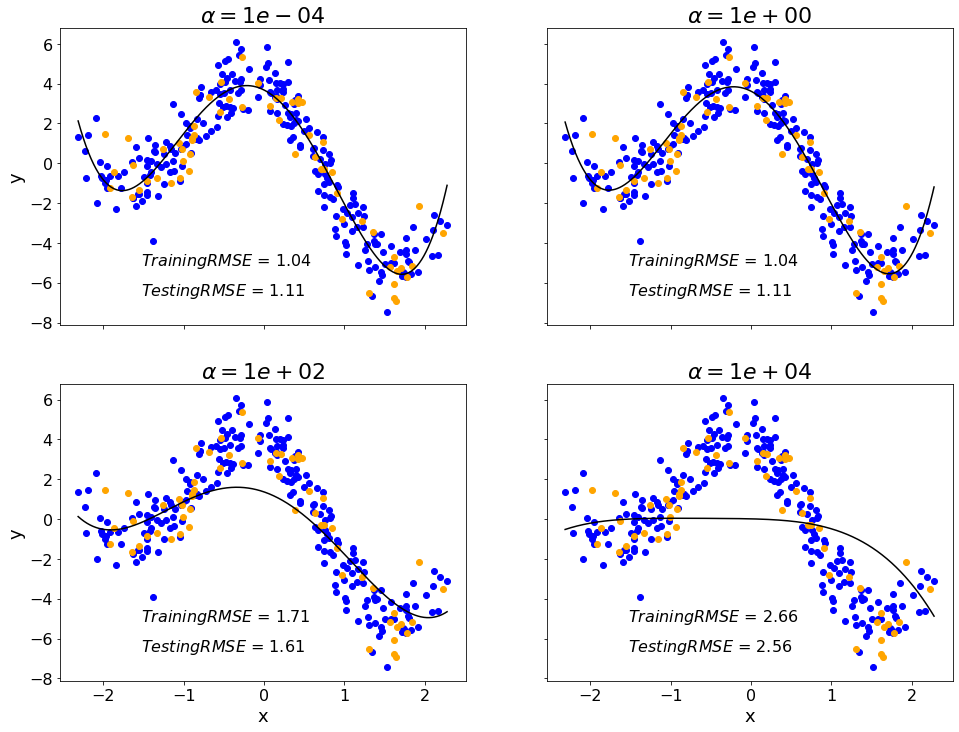

In [24]:
# Create lists to store results
y_pred = []
training_predictions = []
training_rmse = []
testing_predictions = []
testing_rmse = []

# For each of the tested polynomial degree values
alphas = [1E-4, 1E0, 1E2, 1E4]
for alpha_value in alphas:
    krr = KernelRidge(alpha=alpha_value, kernel='polynomial', degree=4)
    krr.fit(x_train, y_train)
    y_pred.append(krr.predict(x_pred))
    pred_y_train = krr.predict(x_train)
    pred_y_test  = krr.predict(x_test)
    
    # Calculate training and testing errors
    training_predictions.append(pred_y_train)
    training_rmse.append(np.sqrt(mean_squared_error(y_train, pred_y_train)))

    testing_predictions.append(pred_y_test)
    testing_rmse.append(np.sqrt(mean_squared_error(y_test, pred_y_test)))

    
# Set axes and labels
# Set axes and labels
fig, axs = plt.subplots(2, 2, figsize = (16,12))
for ax in axs.flat:
    ax.set_xlabel('x', fontsize = 18)
    ax.set_ylabel('y', fontsize = 18)
    ax.scatter(x_train, y_train, color='blue', label='Training')
    ax.scatter(x_test, y_test, color='orange', label='Testing')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# Subplot top-left
axs[0, 0].plot(x_pred, y_pred[0],color='black')
axs[0, 0].set_title(r'$\alpha = %.0e$' % alphas[0], fontsize = 22)
axs[0, 0].annotate(u'$Training RMSE$ = %.2f' % training_rmse[0], xy=(0.2,0.2), xycoords='axes fraction', fontsize=16)
axs[0, 0].annotate(u'$Testing RMSE$ = %.2f' % testing_rmse[0], xy=(0.2,0.1), xycoords='axes fraction', fontsize=16)
# Subplot top-right
axs[0, 1].plot(x_pred, y_pred[1], color='black')
axs[0, 1].set_title(r'$\alpha = %.0e$' % alphas[1], fontsize = 22)
axs[0, 1].annotate(u'$Training RMSE$ = %.2f' % training_rmse[1], xy=(0.2,0.2), xycoords='axes fraction', fontsize=16)
axs[0, 1].annotate(u'$Testing RMSE$ = %.2f' % testing_rmse[1], xy=(0.2,0.1), xycoords='axes fraction', fontsize=16)
# Subplot bottom-left
axs[1, 0].plot(x_pred, y_pred[2], color='black')
axs[1, 0].set_title(r'$\alpha = %.0e$' % alphas[2], fontsize = 22)
axs[1, 0].annotate(u'$Training RMSE$ = %.2f' % training_rmse[2], xy=(0.2,0.2), xycoords='axes fraction', fontsize=16)
axs[1, 0].annotate(u'$Testing RMSE$ = %.2f' % testing_rmse[2], xy=(0.2,0.1), xycoords='axes fraction', fontsize=16)
# Subplot bottom-right
axs[1, 1].plot(x_pred, y_pred[3], color='black')
axs[1, 1].set_title(r'$\alpha = %.0e$' % alphas[3], fontsize = 22)
axs[1, 1].annotate(u'$Training RMSE$ = %.2f' % training_rmse[3], xy=(0.2,0.2), xycoords='axes fraction', fontsize=16)
axs[1, 1].annotate(u'$Testing RMSE$ = %.2f' % testing_rmse[3], xy=(0.2,0.1), xycoords='axes fraction', fontsize=16)
plt.show()

## Question

How do the testing RMSEs change in KKR for different regularization parameters when we modify the degree of the polynomials?